Cleaning and Storing Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sqlalchemy import create_engine

In [3]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'7205458456' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [4]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [ ]:
from sqlalchemy import text

with db_conn.connect() as connection:
    result = connection.execute(text("SELECT 1"))
    print(result.fetchone())



(1,)


In [6]:
table_name = r'Obesity_data'
schema = r'raw' # schema were the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [12]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()

if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate rows.")
    print(df[duplicates])
else:
    print("No duplicate rows found.")



Found 24 duplicate rows.
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
528  Female  21.0    1.52    42.0                             no  yes   3.0   
660  Female  21.0    1.52  

In [13]:

duplicates = df[df.duplicated(keep=False)]


print(duplicates)


     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
97   Female  21.0    1.52    42.0                             no   no   3.0   
98   Female  21.0    1.52    42.0                             no   no   3.0   
105  Female  25.0    1.57    55.0                             no  yes   2.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
145    Male  21.0    1.62    70.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
208  Female  22.0    1.69    65.0                            yes  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
282  Female  18.0    1.62    55.0                            yes  yes   2.0   
295  Female  16.0    1.66    58.0                   

I identified 24 duplicate records and decided to drop them

In [19]:
clean_df = df.drop_duplicates()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [20]:
clean_df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There is not missing values.

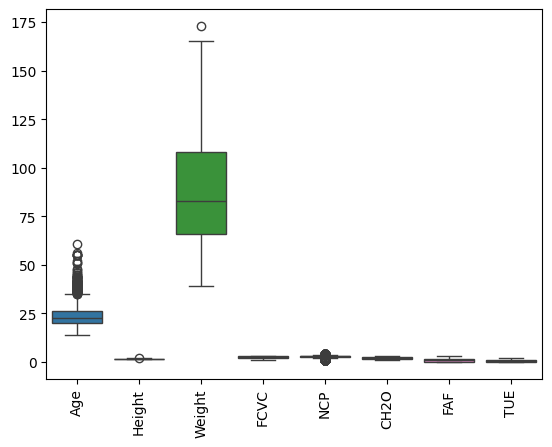

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=clean_df)
plt.xticks(rotation=90)  
plt.show()


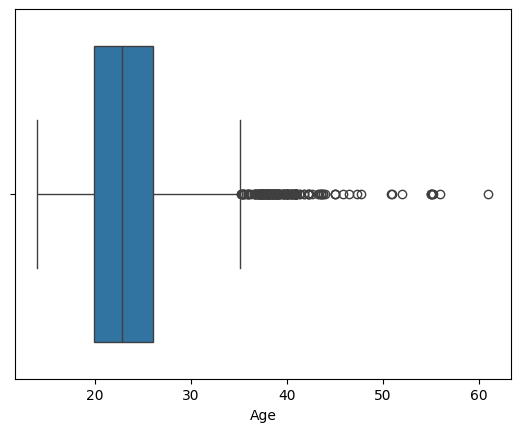

In [23]:
sns.boxplot(x=clean_df['Age'])
plt.show()

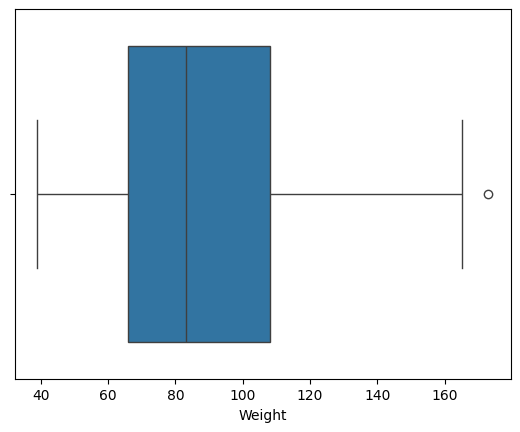

In [24]:
sns.boxplot(x=clean_df['Weight'])
plt.show()

I identified outliers in the boxplots, in columns related to personal information such as age and weight. However, I have decided not to remove them, as these values are realistic.

In [30]:
clean_df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [31]:
clean_df['CALC'] = clean_df['CALC'].replace('no', 'Never')

In [33]:

clean_df['CALC'] = clean_df['CALC'].replace('no', 'Never')


clean_df['CALC'].unique()


array(['Never', 'Sometimes', 'Frequently', 'Always'], dtype=object)

I decided to replace 'no' with 'Never' since it makes more sense with the question

Additionally, since the data description mentions three countries (Mexico, Peru, and Colombia), I believe it’s important to note the absence of a 'demographic' variable (such as country or city) for a better analysis of obesity levels by region.

### Time to load some data
We need to define a name for the table that we are above to create in our database.

In [34]:
table_name = r'clean_df'
schema = r'cleaned' # schema we created this week.

clean_df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

2087